In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data.pickle')

In [3]:
df.head()

field1     field2     field3     field4
created_at                                                     
2019-07-18 22:20:00  25.850000  63.000000  27.700000  56.000000
2019-07-18 22:25:00  25.900000  63.000000  27.700000  55.666667
2019-07-18 22:30:00  25.900000  62.000000  27.650000  55.000000
2019-07-18 22:35:00  25.866667  62.333333  27.666667  54.333333
2019-07-18 22:40:00  25.900000  62.000000  27.700000  54.500000

In [4]:
df['time'] = df.index.hour+df.index.minute/60+df.index.second/3600

In [5]:
df.corr()

field1    field2    field3    field4      time
field1  1.000000  0.493376  0.895931  0.339951  0.089178
field2  0.493376  1.000000  0.389153  0.767337  0.047145
field3  0.895931  0.389153  1.000000  0.196458  0.101484
field4  0.339951  0.767337  0.196458  1.000000  0.140336
time    0.089178  0.047145  0.101484  0.140336  1.000000

In [6]:
df2=pd.DataFrame([])
for col in df.columns:
    for t in range(0,250,25):
        df2[col+'_diff_'+str(t)] = df[col].shift(-t)
print(df2.shape)

(5038, 50)


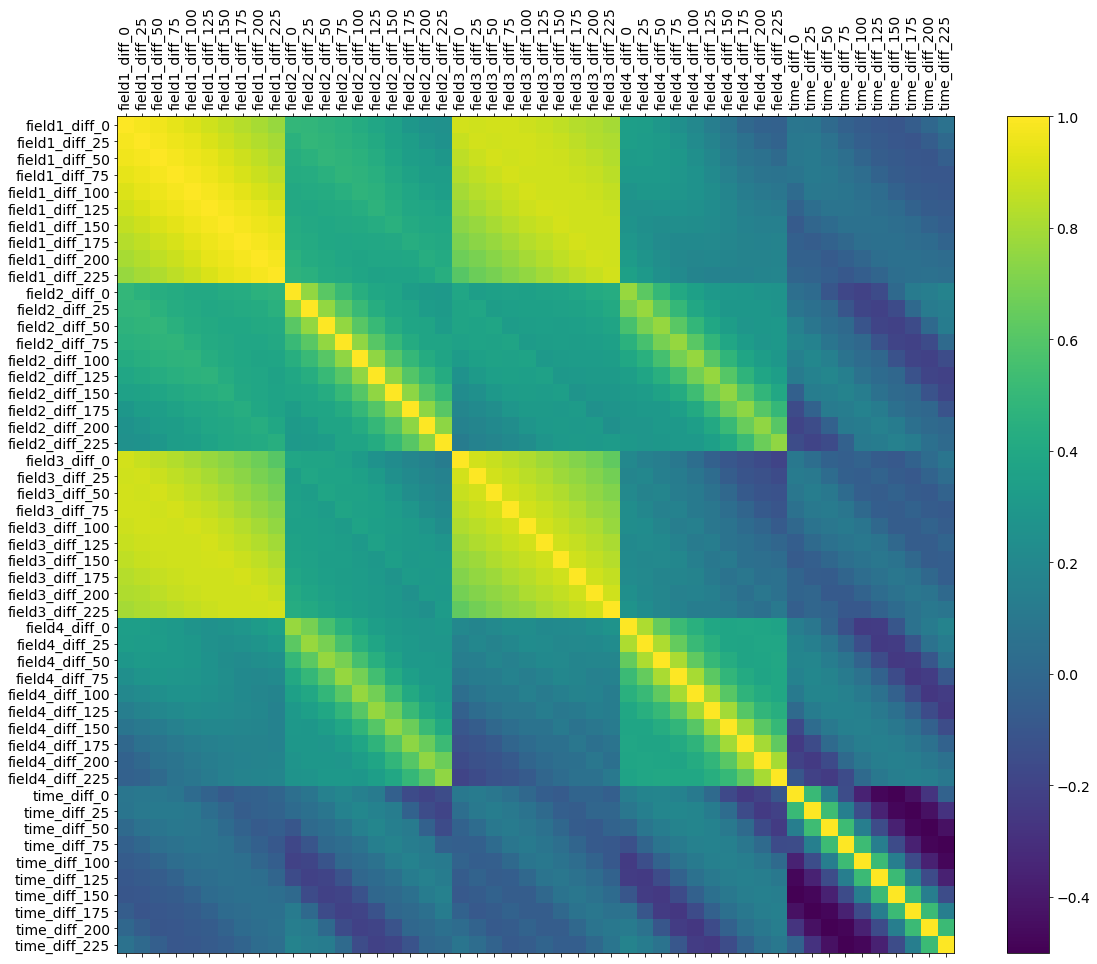

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [8]:
df.shape

(5038, 5)

In [9]:
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D  

rcParams['figure.figsize'] = 15, 7

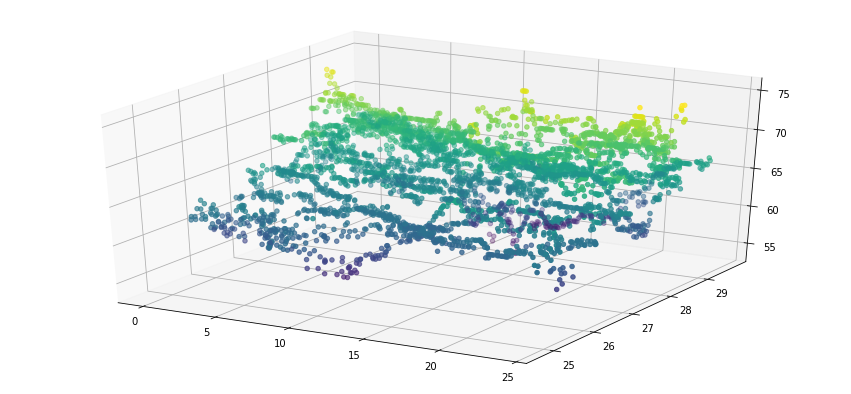

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.time,df.field1,df.field2,c=df.field2)


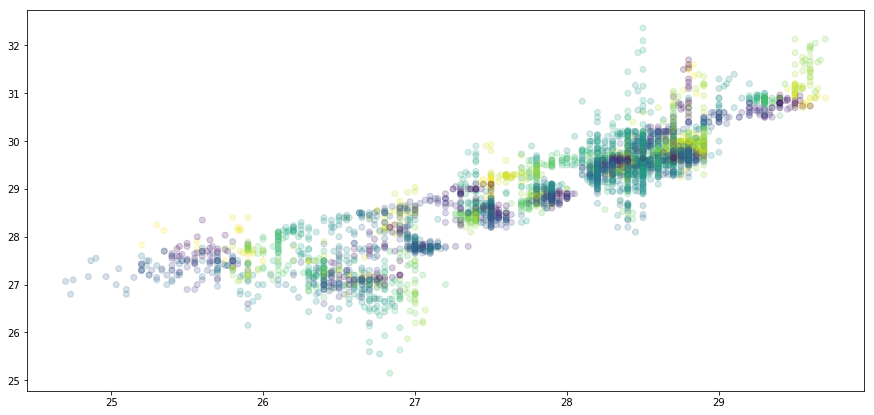

In [11]:
plt.scatter(df.field1,df.field3,c=df.time,alpha=.2)

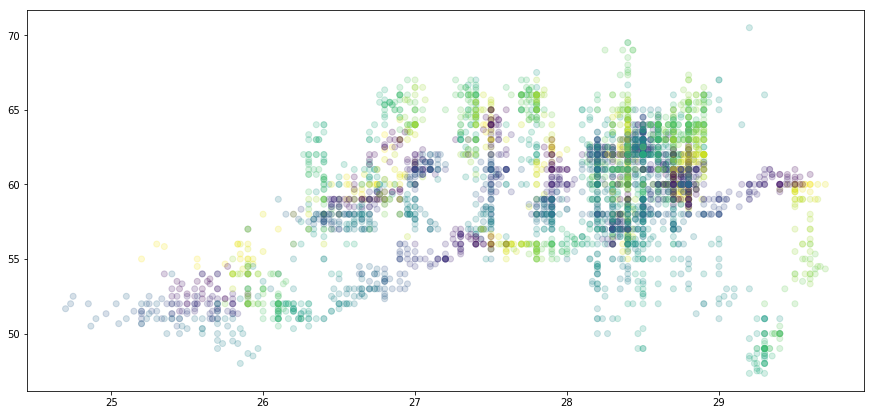

In [12]:
plt.scatter(df.field1,df.field4,c=df.time,alpha=.2)

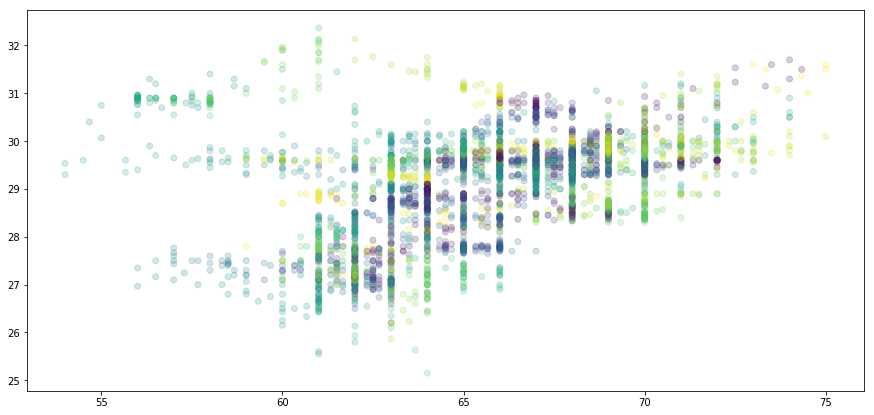

In [13]:
plt.scatter(df.field2,df.field3,c=df.time,alpha=.2)

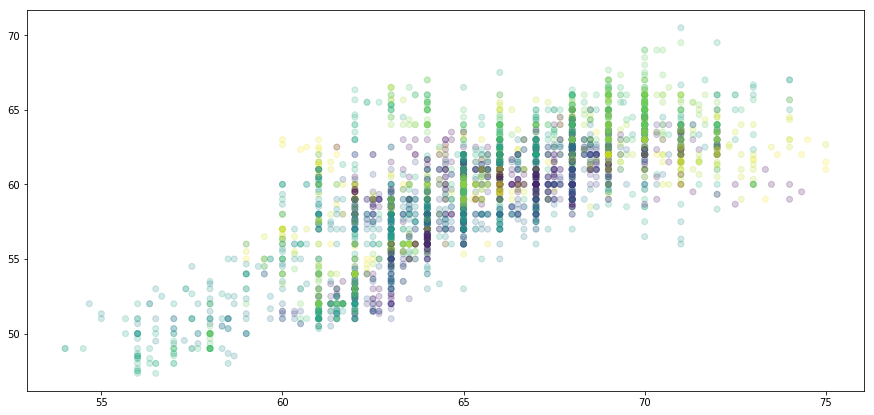

In [14]:
plt.scatter(df.field2,df.field4,c=df.time,alpha=.2)

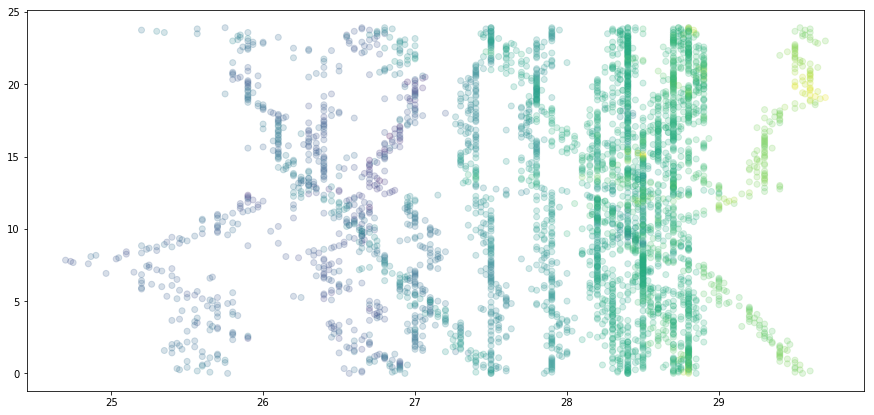

In [15]:
plt.scatter(df.field1,df.time,c=df.field3,alpha=.2)

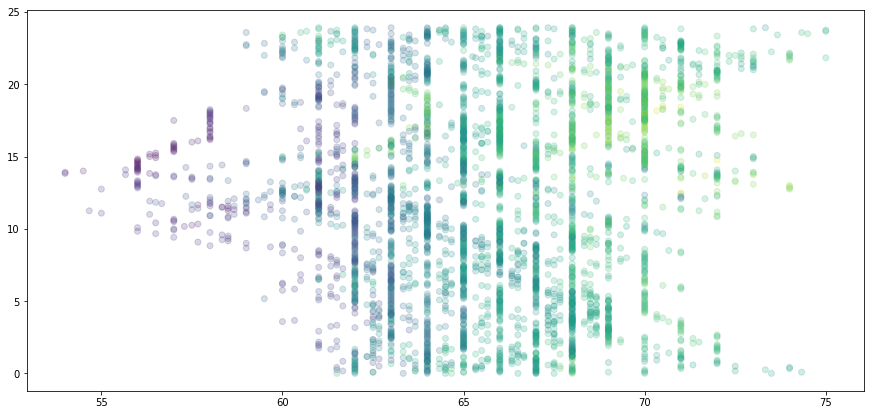

In [16]:
plt.scatter(df.field2,df.time,c=df.field4,alpha=.2)

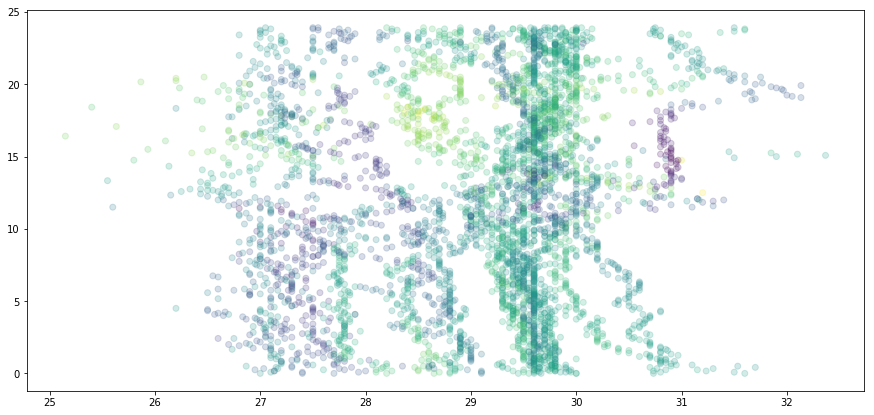

In [17]:
plt.scatter(df.field3,df.time,c=df.field4,alpha=.2)

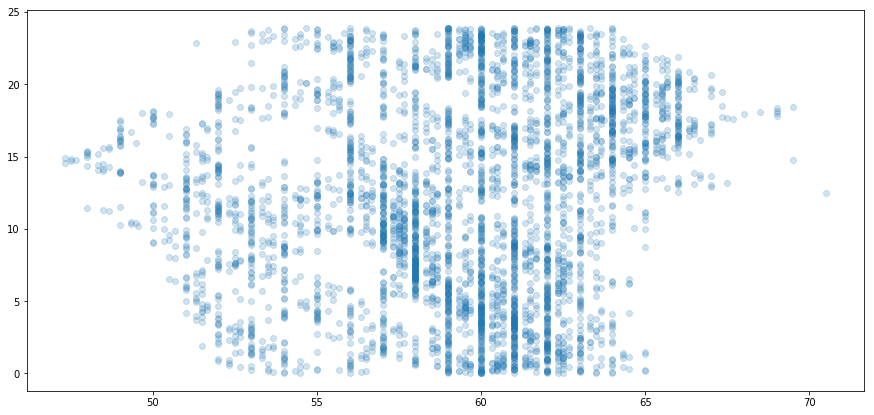

In [18]:
plt.scatter(df.field4,df.time,alpha=.2)

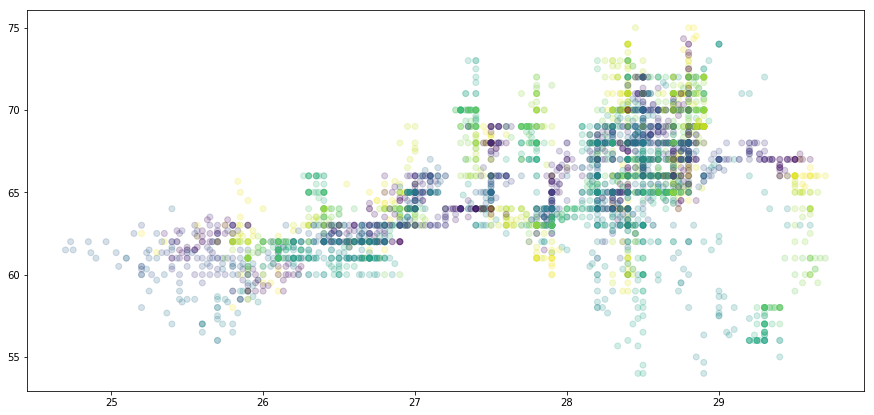

In [19]:
plt.scatter(df.field1,df.field2,c=df.time,alpha=.2)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_pickle('data.pickle')
df['time'] = df.index.hour
df = pd.concat([df,pd.get_dummies(df['time'])],axis=1)

In [22]:
df = df[df.index >= '2019-07-22 00:00:00']

In [23]:
df.drop('time',axis=1,inplace=True)

In [24]:
df.drop(0,axis=1,inplace=True)

In [25]:
dfx = df.copy()
cols = dfx.columns
for col in cols[:4]:
    dfx[col] = dfx[col].interpolate(method='polynomial', order=2)
    dfx[str(col)+'_t10'] = df[col].shift(10)
dfx=dfx.dropna(axis=0)
cols = dfx.columns
cols

Index([    'field1',     'field2',     'field3',     'field4',            1,
                  2,            3,            4,            5,            6,
                  7,            8,            9,           10,           11,
                 12,           13,           14,           15,           16,
                 17,           18,           19,           20,           21,
                 22,           23, 'field1_t10', 'field2_t10', 'field3_t10',
       'field4_t10'],
      dtype='object')

In [26]:
for col in cols[:4]:
    cols2 = list(cols)
    cols2.remove(col)
    print(cols2)
    model = LinearRegression()
    model.fit(dfx[cols2].values, dfx[str(col)].values)
    dfx[str(col)+'_pred'] = model.predict(dfx[cols2].values)

['field2', 'field3', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field3', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field2', 'field4', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']
['field1', 'field2', 'field3', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 'field1_t10', 'field2_t10', 'field3_t10', 'field4_t10']


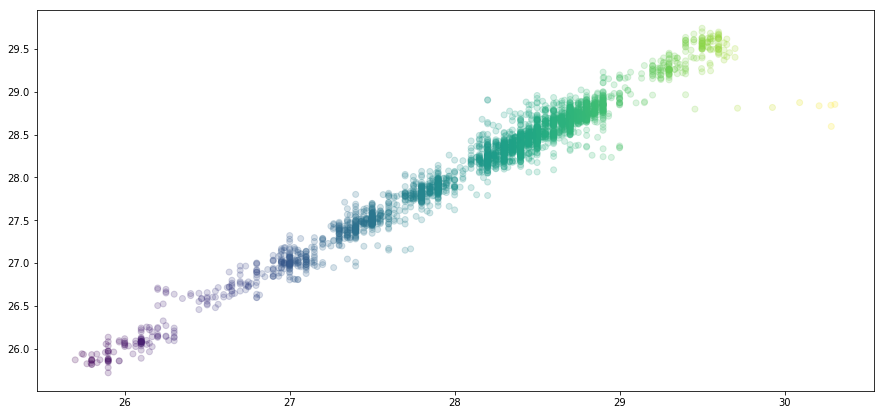

In [27]:
plt.scatter(dfx.field1,dfx.field1_pred,c=dfx.field1,alpha=.2)

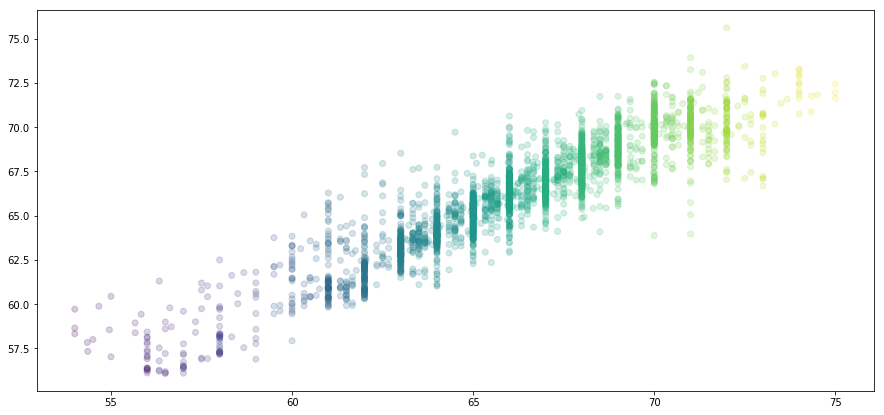

In [28]:
plt.scatter(dfx.field2,dfx.field2_pred,c=dfx.field2,alpha=.2)

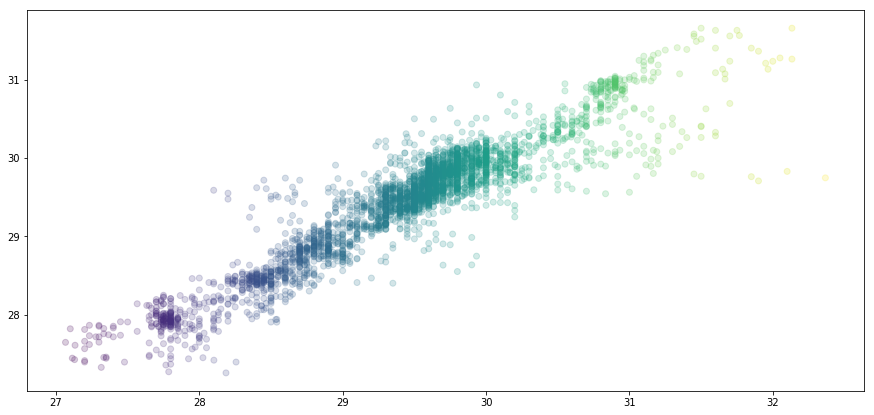

In [29]:
plt.scatter(dfx.field3,dfx.field3_pred,c=dfx.field3,alpha=.2)

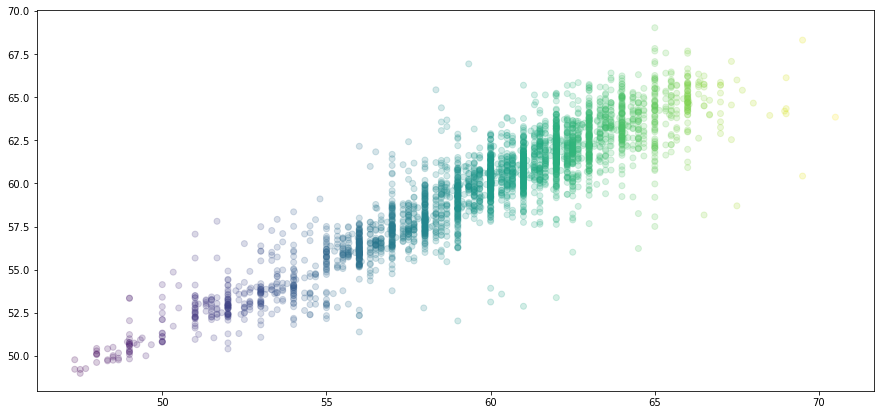

In [30]:
plt.scatter(dfx.field4,dfx.field4_pred,c=dfx.field4,alpha=.2)

In [31]:
print(model.coef_)

[ 1.24777496  0.51854992 -0.76148931  0.37346156 -0.0571692  -0.24375155
 -0.3534065   0.09138982  0.16876091 -0.0469774  -0.12163309 -0.55504098
 -0.34547866 -0.23780775  0.17088262  0.8419388   0.04349756  0.90184505
  0.69853616  0.75148999  0.42321185  0.40383633  0.16490272 -0.23127335
  0.10894426  0.51241568 -0.10258606 -0.22831047 -0.36808632  0.64550972]


In [32]:
dfx

field1     field2     field3     field4  1  2  3  4  \
created_at                                                                    
2019-07-22 00:50:00  26.733333  63.666667  27.950000  62.000000  0  0  0  0   
2019-07-22 00:55:00  26.700000  64.000000  27.733333  61.666667  0  0  0  0   
2019-07-22 01:00:00  26.700000  64.333333  27.800000  62.000000  1  0  0  0   
2019-07-22 01:05:00  26.800000  63.500000  27.800000  62.500000  1  0  0  0   
2019-07-22 01:10:00  26.800000  65.000000  27.850000  62.500000  1  0  0  0   
2019-07-22 01:15:00  26.800000  66.000000  27.766667  62.666667  1  0  0  0   
2019-07-22 01:20:00  26.866667  65.333333  27.700000  62.500000  1  0  0  0   
2019-07-22 01:25:00  27.350000  64.500000  27.800000  63.000000  1  0  0  0   
2019-07-22 01:30:00  27.266667  63.333333  27.800000  63.000000  1  0  0  0   
2019-07-22 01:35:00  27.050000  64.500000  27.833333  62.333333  1  0  0  0   
2019-07-22 01:40:00  27.000000  64.666667  27.850000  61.500000  1  0  0  0   
2019-07-22 01:45:00  27.050000  64.500000  27.833333  61.666667  1  0  0  0   
2019-07-22 01:50:00  27.000000  65.000000  27.800000  62.000000  1  0  0  0   
2019-07-22 01:55:00  27.000000  64.500000  27.766667  61.333333  1  0  0  0   
2019-07-22 02:00:00  27.033333  65.000000  27.750000  62.000000  0  1  0  0   
2019-07-22 02:05:00  27.023492  65.133882  27.858760  62.239955  0  1  0  0   
2019-07-22 02:10:00  27.000000  65.000000  27.900000  62.000000  0  1  0  0   
2019-07-22 02:15:00  27.000000  65.000000  27.733333  61.666667  0  1  0  0   
2019-07-22 02:20:00  27.000000  65.000000  27.750000  61.500000  0  1  0  0   
2019-07-22 02:25:00  27.000000  64.500000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:30:00  27.000000  65.000000  27.766667  61.000000  0  1  0  0   
2019-07-22 02:35:00  27.050000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:40:00  27.000000  66.000000  27.766667  61.333333  0  1  0  0   
2019-07-22 02:45:00  27.000000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:50:00  27.000000  65.333333  27.800000  61.000000  0  1  0  0   
2019-07-22 03:00:00  26.966667  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:05:00  27.000000  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:10:00  27.006112  65.690211  27.806605  61.106199  0  0  1  0   
2019-07-22 03:15:00  27.050000  65.500000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:20:00  27.133333  65.666667  27.800000  60.666667  0  0  1  0   
...                        ...        ...        ...        ... .. .. .. ..   
2019-08-04 19:20:00  25.750000  61.000000  27.750000  52.000000  0  0  0  0   
2019-08-04 19:25:00  25.933333  61.333333  27.733333  52.000000  0  0  0  0   
2019-08-04 19:30:00  25.900000  61.000000  27.900000  52.500000  0  0  0  0   
2019-08-04 19:35:00  25.900000  61.000000  27.733333  52.000000  0  0  0  0   
2019-08-04 19:45:00  25.900000  61.000000  27.733333  52.666667  0  0  0  0   
2019-08-04 19:50:00  25.900000  61.000000  27.400000  53.000000  0  0  0  0   
2019-08-04 19:55:00  25.966667  61.333333  27.333333  54.000000  0  0  0  0   
2019-08-04 20:00:00  25.900000  61.000000  27.300000  54.000000  0  0  0  0   
2019-08-04 20:05:00  25.900000  61.000000  27.133333  54.666667  0  0  0  0   
2019-08-04 20:10:00  25.900000  61.000000  27.200000  54.500000  0  0  0  0   
2019-08-04 20:15:00  25.900000  61.333333  27.233333  54.000000  0  0  0  0   
2019-08-04 20:20:00  25.800000  62.000000  27.200000  55.000000  0  0  0  0   
2019-08-04 20:25:00  25.833333  62.000000  27.066667  54.000000  0  0  0  0   
2019-08-04 20:35:00  25.966667  62.333333  27.300000  54.000000  0  0  0  0   
2019-08-04 20:40:00  25.800000  61.500000  27.350000  54.000000  0  0  0  0   
2019-08-04 20:45:00  25.800000  62.000000  27.333333  54.000000  0  0  0  0   
2019-08-04 20:50:00  25.800000  62.000000  27.350000  54.000000  0  0  0  0   
2019-08-04 20:55:00  25.900000  62.000000  27.200000  54.000000  0  0  0  

In [33]:
dfz = dfx[['field1','field1_pred','field2','field2_pred','field3','field3_pred','field4','field4_pred']]
for i in range(1,5):
    dfz['field'+str(i)+'_diff'] = (dfz['field'+str(i)] - dfz['field'+str(i)+'_pred'])
    dfz['field'+str(i)+'_diff'] = (dfz['field'+str(i)+'_diff'] - dfz['field'+str(i)+'_diff'].mean()) / (dfz['field'+str(i)+'_diff'].max() - dfz['field'+str(i)+'_diff'].min())
dfz

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


field1  field1_pred     field2  field2_pred  \
created_at                                                            
2019-07-22 00:50:00  26.733333    26.963522  63.666667    65.739163   
2019-07-22 00:55:00  26.700000    26.862419  64.000000    65.607678   
2019-07-22 01:00:00  26.700000    26.963883  64.333333    64.780522   
2019-07-22 01:05:00  26.800000    27.000380  63.500000    65.479681   
2019-07-22 01:10:00  26.800000    26.995928  65.000000    65.646245   
2019-07-22 01:15:00  26.800000    26.985639  66.000000    65.518749   
2019-07-22 01:20:00  26.866667    26.923450  65.333333    65.013658   
2019-07-22 01:25:00  27.350000    27.045544  64.500000    65.196566   
2019-07-22 01:30:00  27.266667    26.946296  63.333333    64.654143   
2019-07-22 01:35:00  27.050000    26.807331  64.500000    65.288283   
2019-07-22 01:40:00  27.000000    26.836798  64.666667    64.730123   
2019-07-22 01:45:00  27.050000    26.805892  64.500000    65.054819   
2019-07-22 01:50:00  27.000000    26.802657  65.000000    65.341300   
2019-07-22 01:55:00  27.000000    26.895631  64.500000    64.383776   
2019-07-22 02:00:00  27.033333    26.807435  65.000000    65.753987   
2019-07-22 02:05:00  27.023492    26.813631  65.133882    66.648521   
2019-07-22 02:10:00  27.000000    26.881398  65.000000    66.174515   
2019-07-22 02:15:00  27.000000    27.320260  65.000000    64.915239   
2019-07-22 02:20:00  27.000000    27.249336  65.000000    64.170931   
2019-07-22 02:25:00  27.000000    27.039321  64.500000    64.973267   
2019-07-22 02:30:00  27.000000    26.983422  65.000000    65.135354   
2019-07-22 02:35:00  27.050000    27.034496  65.000000    65.008008   
2019-07-22 02:40:00  27.000000    26.982434  66.000000    65.450636   
2019-07-22 02:45:00  27.000000    26.987407  65.000000    65.103021   
2019-07-22 02:50:00  27.000000    27.016567  65.333333    65.349342   
2019-07-22 03:00:00  26.966667    27.001815  66.000000    65.578385   
2019-07-22 03:05:00  27.000000    27.002341  66.000000    65.621822   
2019-07-22 03:10:00  27.006112    27.004581  65.690211    65.682560   
2019-07-22 03:15:00  27.050000    27.004468  65.500000    65.322742   
2019-07-22 03:20:00  27.133333    26.997779  65.666667    65.476774   
...                        ...          ...        ...          ...   
2019-08-04 19:20:00  25.750000    25.931472  61.000000    61.208598   
2019-08-04 19:25:00  25.933333    25.959692  61.333333    60.958011   
2019-08-04 19:30:00  25.900000    25.947092  61.000000    61.519674   
2019-08-04 19:35:00  25.900000    25.873388  61.000000    60.379602   
2019-08-04 19:45:00  25.900000    25.878578  61.000000    60.948830   
2019-08-04 19:50:00  25.900000    25.853503  61.000000    60.660889   
2019-08-04 19:55:00  25.966667    25.855809  61.333333    60.935520   
2019-08-04 20:00:00  25.900000    25.857993  61.000000    61.165792   
2019-08-04 20:05:00  25.900000    25.851446  61.000000    61.217588   
2019-08-04 20:10:00  25.900000    25.716128  61.000000    61.342709   
2019-08-04 20:15:00  25.900000    25.881263  61.333333    61.289692   
2019-08-04 20:20:00  25.800000    25.856311  62.000000    61.428734   
2019-08-04 20:25:00  25.833333    25.835441  62.000000    60.899098   
2019-08-04 20:35:00  25.966667    25.855471  62.333333    61.097922   
2019-08-04 20:40:00  25.800000    25.868245  61.500000    61.274339   
2019-08-04 20:45:00  25.800000    25.929061  62.000000    61.350040   
2019-08-04 20:50:00  25.800000    25.870691  62.000000    61.205420   
2019-08-04 20:55:00  25.900000    25.862659  62.000000    60.926298   
2019-08-04 21:00:00  25.850000    25.868228  62.000000    60.805711   
2019-08-04 21:05:00  25.800000    25.865732  62.000000    61.119074   
2019-08-04 21:10:00  25.900000    25.777791  62.000000    61.550652   
2019-08-04 21:15:00  25.800000    25.814076  62.000000    61.765732   
2019-08-04 21:20:00  25.900000    25.839302  62.000000    61.792228   
2019-08-04 21:25:00  25.882863    25.954904  61.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


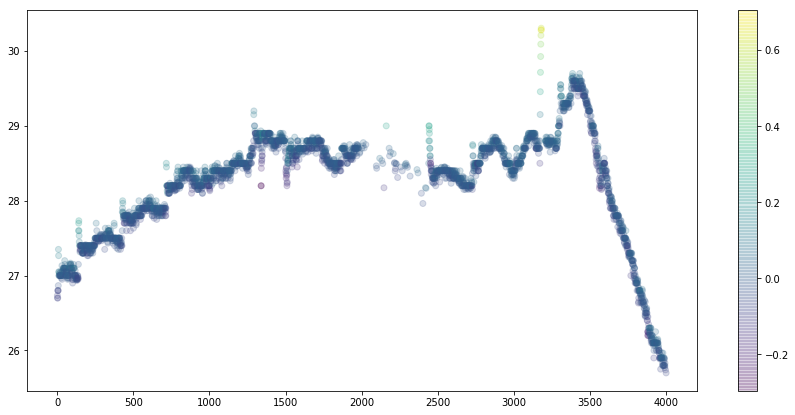

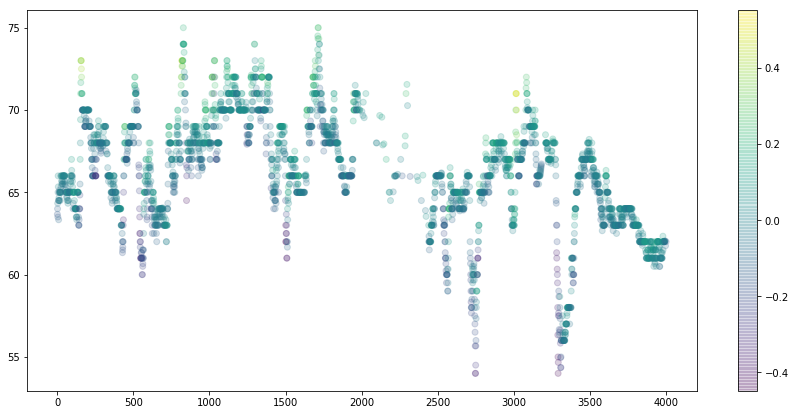

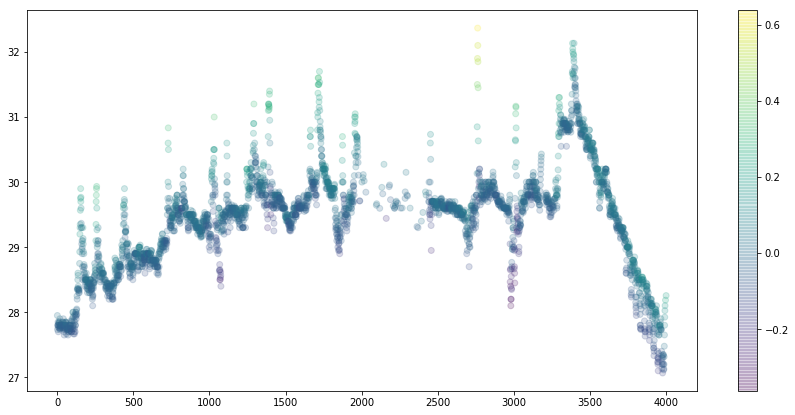

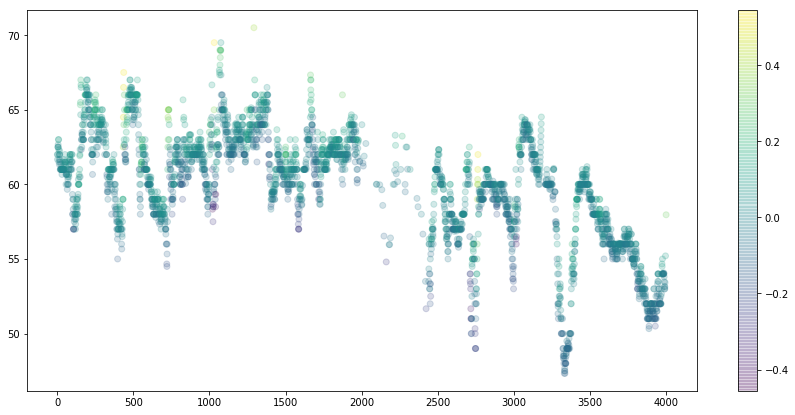

In [34]:
dfz['time'] = (dfz.index.astype(np.int64) - dfz.index.astype(np.int64).min())/300000000000
for g in range(1,5):
    plt.scatter(dfz.time,dfz['field'+str(g)],c=dfz['field'+str(g)+'_diff'], alpha=.2)
    plt.colorbar()
    plt.show()

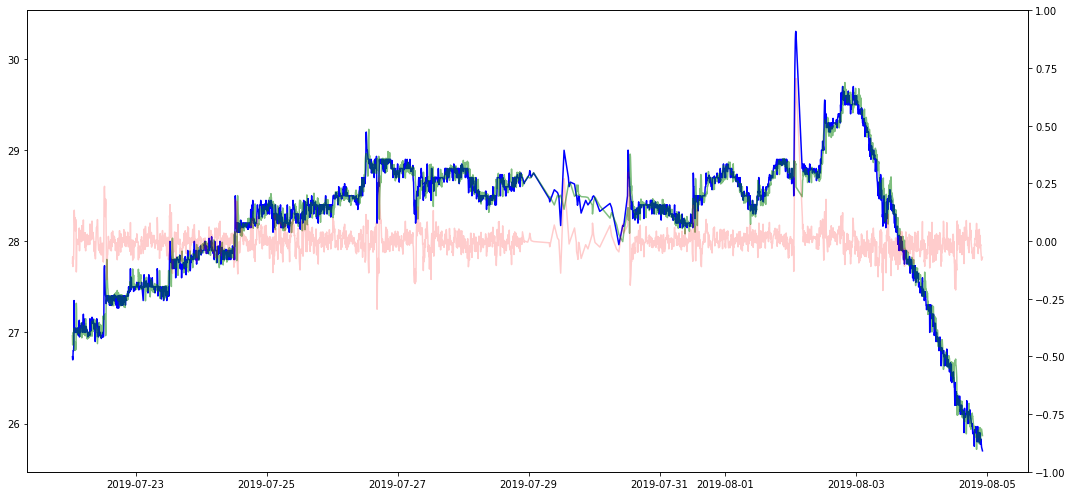

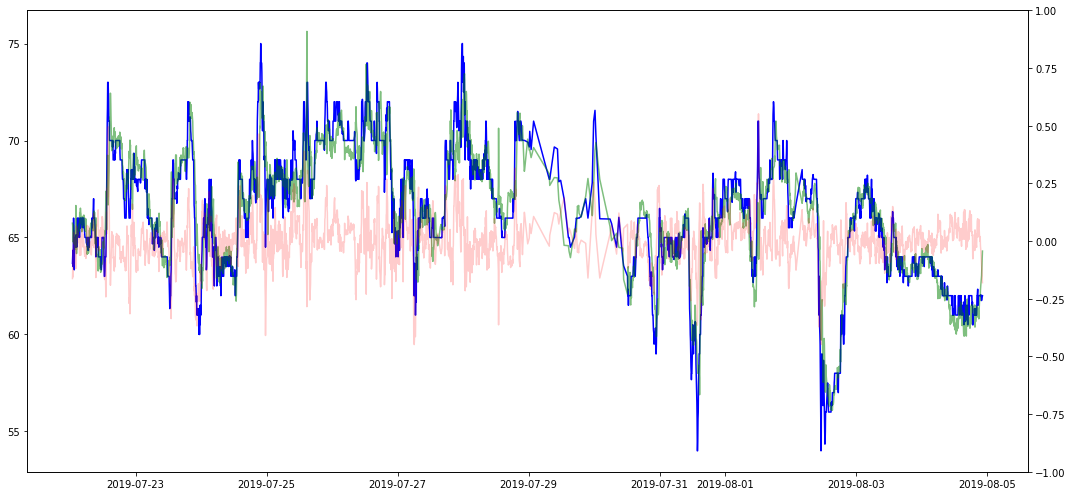

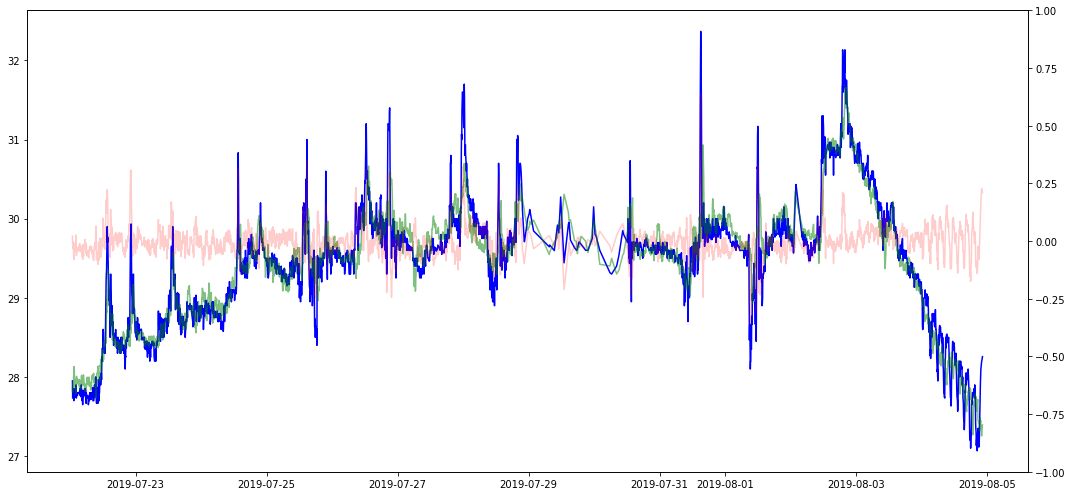

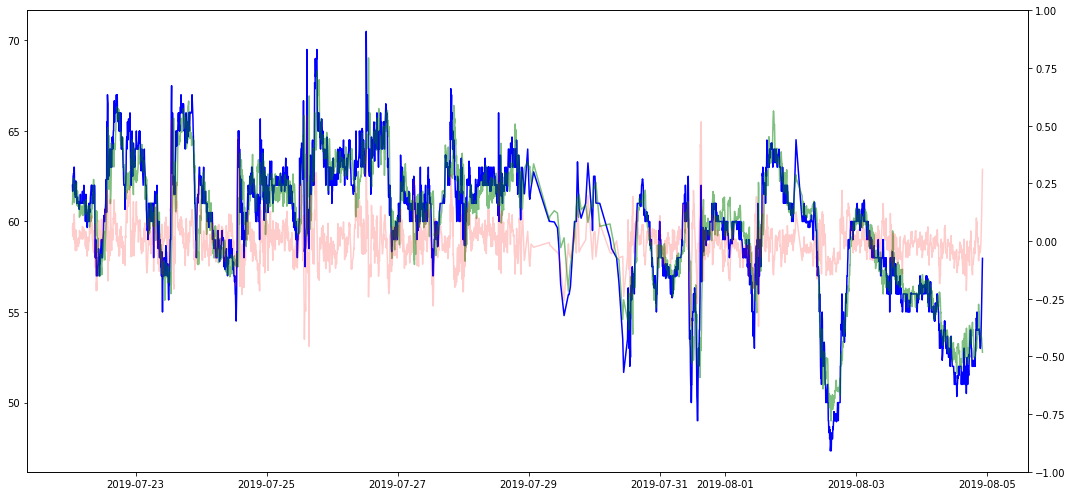

In [35]:
for g in range(1,5):
    fig, ax1 = plt.subplots()
    ax1.plot(dfz['field'+str(g)],c='b')
    ax1.plot(dfz['field'+str(g)+'_pred'],c='g',alpha=.5)
    ax2 = ax1.twinx()
    ax2.set_ylim(-1,1)
    ax2.plot(dfz['field'+str(g)+'_diff'],c='r',alpha=.2)
    fig.tight_layout() 
    plt.show()

In [36]:
dfz.head()

field1  field1_pred     field2  field2_pred  \
created_at                                                            
2019-07-22 00:50:00  26.733333    26.963522  63.666667    65.739163   
2019-07-22 00:55:00  26.700000    26.862419  64.000000    65.607678   
2019-07-22 01:00:00  26.700000    26.963883  64.333333    64.780522   
2019-07-22 01:05:00  26.800000    27.000380  63.500000    65.479681   
2019-07-22 01:10:00  26.800000    26.995928  65.000000    65.646245   

                        field3  field3_pred     field4  field4_pred  \
created_at                                                            
2019-07-22 00:50:00  27.950000    27.860424  62.000000    60.961329   
2019-07-22 00:55:00  27.733333    27.810181  61.666667    61.226830   
2019-07-22 01:00:00  27.800000    27.933106  62.000000    61.647112   
2019-07-22 01:05:00  27.800000    27.812365  62.500000    61.201299   
2019-07-22 01:10:00  27.850000    27.928726  62.500000    61.884593   

                     field1_diff  field2_diff  field3_diff  field4_diff  time  
created_at                                                                     
2019-07-22 00:50:00    -0.096115    -0.162414     0.021805     0.062296   0.0  
2019-07-22 00:55:00    -0.067818    -0.125988    -0.018707     0.026380   1.0  
2019-07-22 01:00:00    -0.110184    -0.035044    -0.032401     0.021165   2.0  
2019-07-22 01:05:00    -0.083668    -0.155140    -0.003010     0.077891   3.0  
2019-07-22 01:10:00    -0.081810    -0.050644    -0.019164     0.036910   4.0

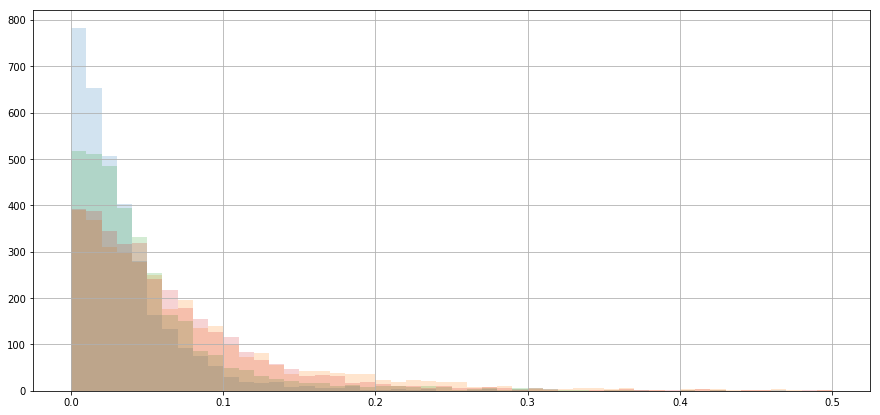

In [37]:
for g in range(1,5):
    dfz['field'+str(g)+'_diff'].apply(abs).hist(range=(0,.5),bins=50, alpha=.2)

In [38]:
[x for x in dfz.columns if 'field' in x]

['field1',
 'field1_pred',
 'field2',
 'field2_pred',
 'field3',
 'field3_pred',
 'field4',
 'field4_pred',
 'field1_diff',
 'field2_diff',
 'field3_diff',
 'field4_diff']

In [40]:
dfx

field1     field2     field3     field4  1  2  3  4  \
created_at                                                                    
2019-07-22 00:50:00  26.733333  63.666667  27.950000  62.000000  0  0  0  0   
2019-07-22 00:55:00  26.700000  64.000000  27.733333  61.666667  0  0  0  0   
2019-07-22 01:00:00  26.700000  64.333333  27.800000  62.000000  1  0  0  0   
2019-07-22 01:05:00  26.800000  63.500000  27.800000  62.500000  1  0  0  0   
2019-07-22 01:10:00  26.800000  65.000000  27.850000  62.500000  1  0  0  0   
2019-07-22 01:15:00  26.800000  66.000000  27.766667  62.666667  1  0  0  0   
2019-07-22 01:20:00  26.866667  65.333333  27.700000  62.500000  1  0  0  0   
2019-07-22 01:25:00  27.350000  64.500000  27.800000  63.000000  1  0  0  0   
2019-07-22 01:30:00  27.266667  63.333333  27.800000  63.000000  1  0  0  0   
2019-07-22 01:35:00  27.050000  64.500000  27.833333  62.333333  1  0  0  0   
2019-07-22 01:40:00  27.000000  64.666667  27.850000  61.500000  1  0  0  0   
2019-07-22 01:45:00  27.050000  64.500000  27.833333  61.666667  1  0  0  0   
2019-07-22 01:50:00  27.000000  65.000000  27.800000  62.000000  1  0  0  0   
2019-07-22 01:55:00  27.000000  64.500000  27.766667  61.333333  1  0  0  0   
2019-07-22 02:00:00  27.033333  65.000000  27.750000  62.000000  0  1  0  0   
2019-07-22 02:05:00  27.023492  65.133882  27.858760  62.239955  0  1  0  0   
2019-07-22 02:10:00  27.000000  65.000000  27.900000  62.000000  0  1  0  0   
2019-07-22 02:15:00  27.000000  65.000000  27.733333  61.666667  0  1  0  0   
2019-07-22 02:20:00  27.000000  65.000000  27.750000  61.500000  0  1  0  0   
2019-07-22 02:25:00  27.000000  64.500000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:30:00  27.000000  65.000000  27.766667  61.000000  0  1  0  0   
2019-07-22 02:35:00  27.050000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:40:00  27.000000  66.000000  27.766667  61.333333  0  1  0  0   
2019-07-22 02:45:00  27.000000  65.000000  27.800000  61.000000  0  1  0  0   
2019-07-22 02:50:00  27.000000  65.333333  27.800000  61.000000  0  1  0  0   
2019-07-22 03:00:00  26.966667  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:05:00  27.000000  66.000000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:10:00  27.006112  65.690211  27.806605  61.106199  0  0  1  0   
2019-07-22 03:15:00  27.050000  65.500000  27.800000  61.000000  0  0  1  0   
2019-07-22 03:20:00  27.133333  65.666667  27.800000  60.666667  0  0  1  0   
...                        ...        ...        ...        ... .. .. .. ..   
2019-08-04 19:20:00  25.750000  61.000000  27.750000  52.000000  0  0  0  0   
2019-08-04 19:25:00  25.933333  61.333333  27.733333  52.000000  0  0  0  0   
2019-08-04 19:30:00  25.900000  61.000000  27.900000  52.500000  0  0  0  0   
2019-08-04 19:35:00  25.900000  61.000000  27.733333  52.000000  0  0  0  0   
2019-08-04 19:45:00  25.900000  61.000000  27.733333  52.666667  0  0  0  0   
2019-08-04 19:50:00  25.900000  61.000000  27.400000  53.000000  0  0  0  0   
2019-08-04 19:55:00  25.966667  61.333333  27.333333  54.000000  0  0  0  0   
2019-08-04 20:00:00  25.900000  61.000000  27.300000  54.000000  0  0  0  0   
2019-08-04 20:05:00  25.900000  61.000000  27.133333  54.666667  0  0  0  0   
2019-08-04 20:10:00  25.900000  61.000000  27.200000  54.500000  0  0  0  0   
2019-08-04 20:15:00  25.900000  61.333333  27.233333  54.000000  0  0  0  0   
2019-08-04 20:20:00  25.800000  62.000000  27.200000  55.000000  0  0  0  0   
2019-08-04 20:25:00  25.833333  62.000000  27.066667  54.000000  0  0  0  0   
2019-08-04 20:35:00  25.966667  62.333333  27.300000  54.000000  0  0  0  0   
2019-08-04 20:40:00  25.800000  61.500000  27.350000  54.000000  0  0  0  0   
2019-08-04 20:45:00  25.800000  62.000000  27.333333  54.000000  0  0  0  0   
2019-08-04 20:50:00  25.800000  62.000000  27.350000  54.000000  0  0  0  0   
2019-08-04 20:55:00  25.900000  62.000000  27.200000  54.000000  0  0  0  

In [43]:
raw = pd.read_pickle('raw_data.pickle')
raw

created_at  entry_id  field1  field2  field3  field4
0    2019-07-29 23:18:23     43673     NaN     NaN    29.6    60.0
1    2019-07-29 23:22:25     43674     NaN     NaN    29.7    60.0
2    2019-07-29 23:24:25     43675     NaN     NaN    29.8    60.0
3    2019-07-29 23:26:26     43676     NaN     NaN    29.9    59.0
4    2019-07-29 23:28:27     43677     NaN     NaN    29.8    60.0
5    2019-07-29 23:30:27     43678     NaN     NaN    29.8    60.0
6    2019-07-29 23:32:29     43679    28.5    69.0     NaN     NaN
7    2019-07-29 23:34:29     43680    28.5    69.0     NaN     NaN
8    2019-07-29 23:36:30     43681    28.5    69.0     NaN     NaN
9    2019-07-29 23:44:38     43682     NaN     NaN    30.0    61.0
10   2019-07-29 23:48:42     43683     NaN     NaN    30.0    62.0
11   2019-07-29 23:50:46     43684     NaN     NaN    30.1    64.0
12   2019-07-29 23:52:47     43685     NaN     NaN    30.2    61.0
13   2019-07-29 23:54:55     43686    28.5    71.0     NaN     NaN
14   2019-07-29 23:56:50     43687     NaN     NaN    30.1    62.0
15   2019-07-29 23:58:50     43688     NaN     NaN    30.0    62.0
16   2019-07-30 00:00:51     43689     NaN     NaN    30.0    63.0
17   2019-07-30 00:02:52     43690     NaN     NaN    30.0    62.0
18   2019-07-30 00:04:53     43691     NaN     NaN    30.0    62.0
19   2019-07-30 00:06:57     43692     NaN     NaN    29.8    63.0
20   2019-07-30 00:08:58     43693     NaN     NaN    29.8    63.0
21   2019-07-30 00:10:59     43694     NaN     NaN    29.8    63.0
22   2019-07-30 00:12:59     43695     NaN     NaN    29.7    63.0
23   2019-07-30 00:17:00     43696     NaN     NaN    29.8    63.0
24   2019-07-30 00:19:01     43697     NaN     NaN    29.8    63.0
25   2019-07-30 00:21:02     43698     NaN     NaN    29.8    63.0
26   2019-07-30 00:23:02     43699     NaN     NaN    29.8    62.0
27   2019-07-30 00:25:03     43700     NaN     NaN    29.7    61.0
28   2019-07-30 00:27:03     43701     NaN     NaN    30.0    62.0
29   2019-07-30 00:29:04     43702     NaN     NaN    29.8    62.0
...                  ...       ...     ...     ...     ...     ...
7970 2019-08-05 09:31:27     51643     NaN     NaN    27.5    54.0
7971 2019-08-05 09:33:27     51644     NaN     NaN    27.5    54.0
7972 2019-08-05 09:35:28     51645     NaN     NaN    27.3    54.0
7973 2019-08-05 09:37:28     51646     NaN     NaN    27.3    54.0
7974 2019-08-05 09:39:29     51647     NaN     NaN    27.1    54.0
7975 2019-08-05 09:41:30     51648     NaN     NaN    27.3    54.0
7976 2019-08-05 09:43:30     51649     NaN     NaN    27.2    55.0
7977 2019-08-05 09:45:31     51650     NaN     NaN    27.3    55.0
7978 2019-08-05 09:47:31     51651     NaN     NaN    27.4    54.0
7979 2019-08-05 09:49:32     51652     NaN     NaN    27.4    55.0
7980 2019-08-05 09:51:32     51653     NaN     NaN    27.5    54.0
7981 2019-08-05 09:53:33     51654     NaN     NaN    27.6    55.0
7982 2019-08-05 09:55:34     51655     NaN     NaN    27.5    55.0
7983 2019-08-05 09:57:34     51656     NaN     NaN    27.3    56.0
7984 2019-08-05 09:59:35     51657     NaN     NaN    27.5    54.0
7985 2019-08-05 10:01:35     51658     NaN     NaN    27.5    55.0
7986 2019-08-05 10:03:37     51659     NaN     NaN    27.5    55.0
7987 2019-08-05 10:05:37     51660     NaN     NaN    27.5    56.0
7988 2019-08-05 10:07:38     51661     NaN     NaN    27.3    55.0
7989 2019-08-05 10:09:38     51662     NaN     NaN    27.5    55.0
7990 2019-08-05 10:11:39     51663     NaN     NaN    27.5    55.0
7991 2019-08-05 10:13:40     51664     NaN     NaN    27.5    55.0
7992 2019-08-05 10:15:40     51665     NaN     NaN    27.3    54.0
7993 2019-08-05 10:17:41     51666     NaN     NaN    27.5    55.0
7994 2019-08-05 10:19:41     51667     NaN     NaN    27.5    54.0
7995 2019-08-05 10:21:42     51668     NaN     NaN    27.5    54.0
7996 2019-08-05 10:23:42     51669     NaN     NaN    27.2    53.0
7997 2019-08-05 10:25:43     51670     NaN     NaN    27.4   

In [44]:
field1 = raw[['created_at','field1']]

In [49]:
field1.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
field1['diff'] = field1['field1'] - field1['field1'].shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
field1.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
raw2 =  raw.set_index('created_at').resample("2T").mean().interpolate('linear')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDF73DE860>,
      dtype=object)

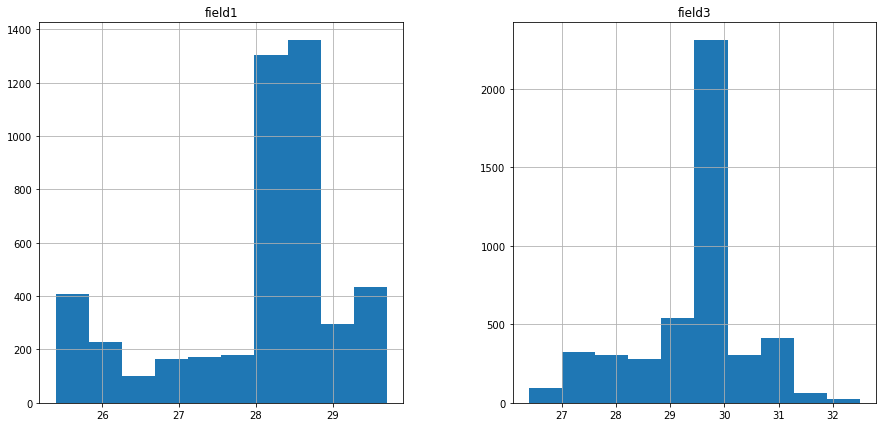

In [136]:
raw2[['field1','field3']].hist()

In [137]:
raw2['diff_1'] = raw2['field1'] - raw2['field1'].shift(1)
raw2['diff_2'] = raw2['field2'] - raw2['field2'].shift(1)
raw2['diff_3'] = raw2['field3'] - raw2['field3'].shift(1)
raw2['diff_4'] = raw2['field4'] - raw2['field4'].shift(1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDF78AF4E0>,
      dtype=object)

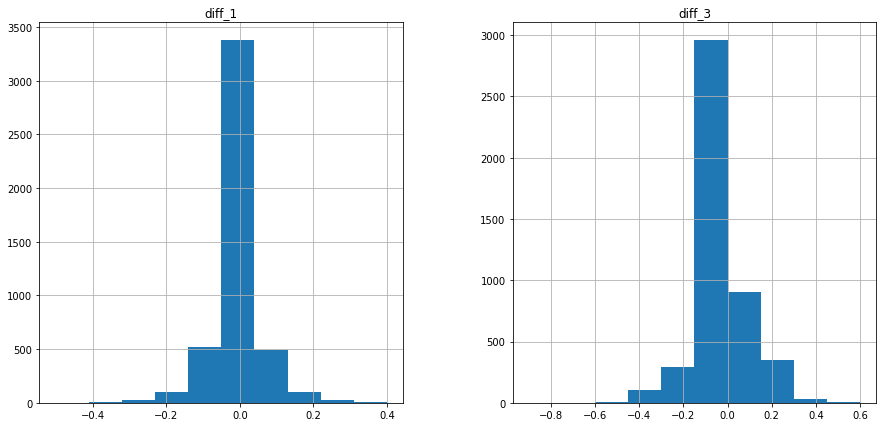

In [138]:
raw2[['diff_1','diff_3']].hist()

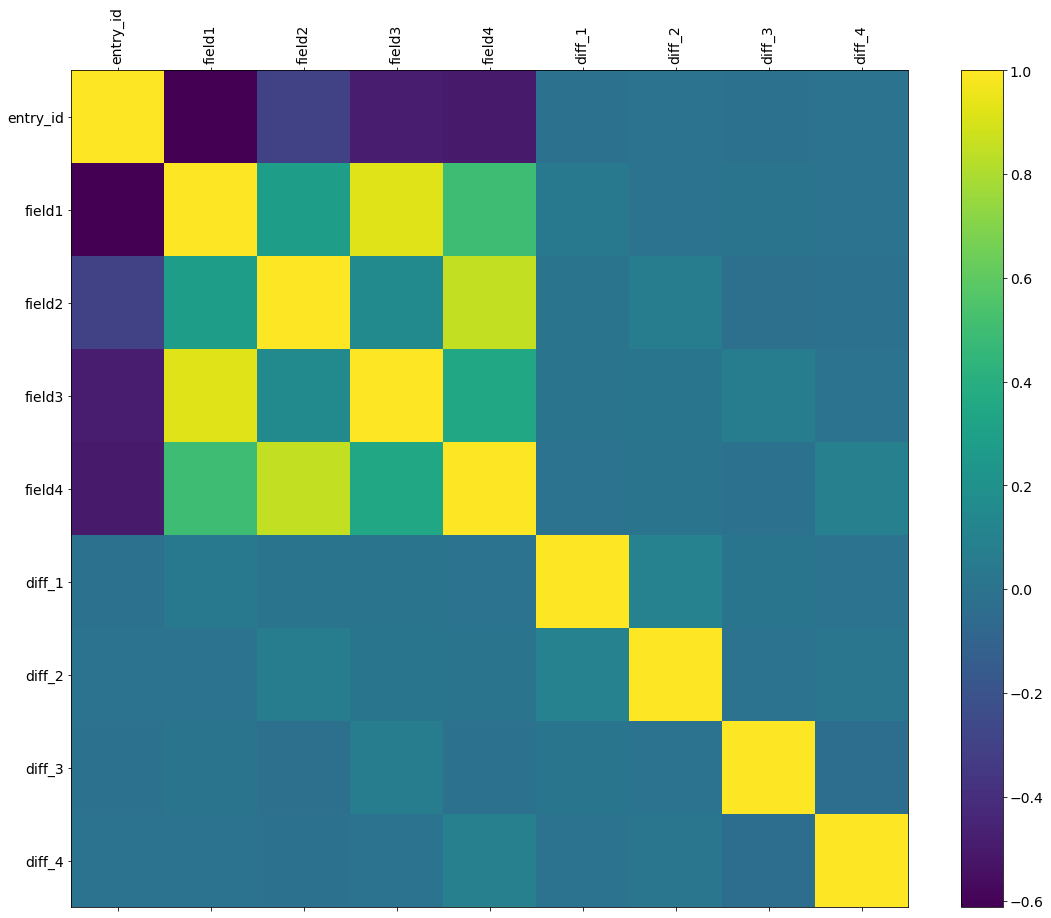

In [139]:
f = plt.figure(figsize=(19, 15))
plt.matshow(raw2.corr(), fignum=f.number)
plt.xticks(range(raw2.shape[1]), raw2.columns, fontsize=14, rotation=90)
plt.yticks(range(raw2.shape[1]), raw2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

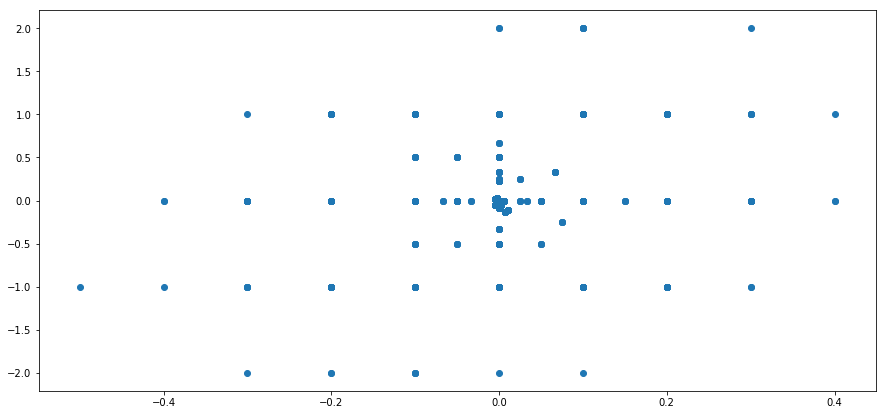

In [140]:
plt.scatter(raw2.diff_1,raw2.diff_2)

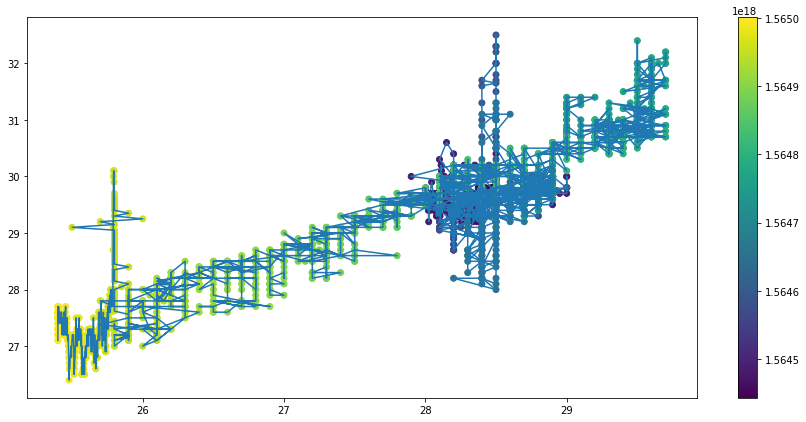

In [141]:
plt.scatter(raw2.field1,raw2.field3,c=raw2.index)
plt.plot(raw2.field1,raw2.field3)
plt.colorbar()

In [151]:
raw2.diff_1 = raw2.diff_1 + np.random.normal(0, .2, len(raw2.diff_1))

In [153]:
raw2.diff_3 = raw2.diff_3 + np.random.normal(0, .2, len(raw2.diff_3))

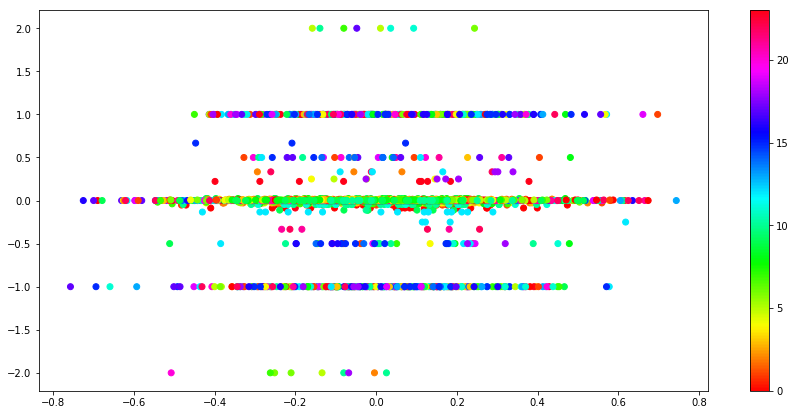

In [154]:
plt.scatter(raw2.diff_1,raw2.diff_2,c=raw2.index.hour,cmap='hsv')
plt.colorbar()

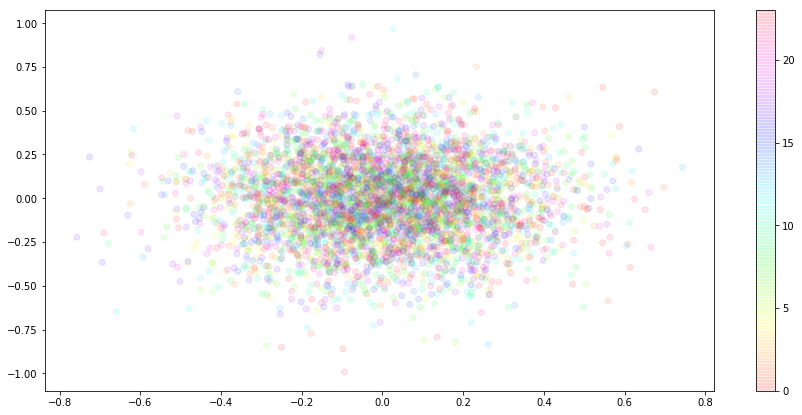

In [172]:
plt.scatter(raw2.diff_1,raw2.diff_3,c=raw2.index.hour,cmap='hsv', alpha=.1)
plt.colorbar()

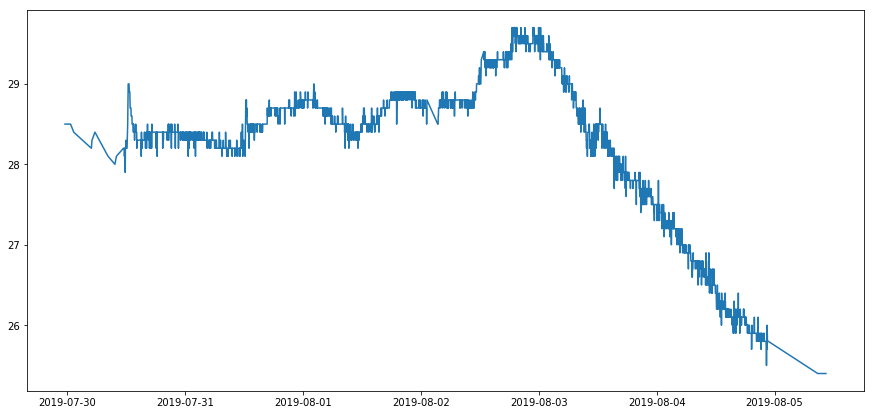

In [199]:
plt.plot(raw2.field1)

In [186]:
raw2['hour'] = raw2.index.hour + np.round(raw2.index.minute/3,0)/10